In [84]:
import math
import random 
import networkx as nx
import matplotlib.pyplot as plt

In [85]:
random.seed(50) # Must be in the same code chunk as when I am doing the randomness

G = nx.Graph()
x_axis = {}
y_axis = {}
for i in range(0, 20): # n = 20 nodes
    x_axis[i] = round(random.random(), 3)
    y_axis[i] = round(random.random(), 3)
    G.add_node(i)

nx.set_node_attributes(G, x_axis, name='x_axis')
nx.set_node_attributes(G, y_axis, name='y_axis')

In [86]:
G.nodes().data()

NodeDataView({0: {'x_axis': 0.498, 'y_axis': 0.266}, 1: {'x_axis': 0.637, 'y_axis': 0.242}, 2: {'x_axis': 0.473, 'y_axis': 0.97}, 3: {'x_axis': 0.085, 'y_axis': 0.317}, 4: {'x_axis': 0.676, 'y_axis': 0.085}, 5: {'x_axis': 0.153, 'y_axis': 0.825}, 6: {'x_axis': 0.98, 'y_axis': 0.319}, 7: {'x_axis': 0.189, 'y_axis': 0.972}, 8: {'x_axis': 0.329, 'y_axis': 0.604}, 9: {'x_axis': 0.607, 'y_axis': 0.635}, 10: {'x_axis': 0.915, 'y_axis': 0.962}, 11: {'x_axis': 0.693, 'y_axis': 0.825}, 12: {'x_axis': 0.794, 'y_axis': 0.643}, 13: {'x_axis': 0.43, 'y_axis': 0.227}, 14: {'x_axis': 0.266, 'y_axis': 0.93}, 15: {'x_axis': 0.7, 'y_axis': 0.106}, 16: {'x_axis': 0.911, 'y_axis': 0.271}, 17: {'x_axis': 0.692, 'y_axis': 0.46}, 18: {'x_axis': 0.27, 'y_axis': 0.209}, 19: {'x_axis': 0.579, 'y_axis': 0.412}})

In [87]:
G.nodes()[0]['x_axis']

0.498

In [88]:
# Create edges between points based on distance and probability

for i in range(0, 20): # Go from 0 to n-1
    for j in range(i+1, 20): # Go from i+1 to n-1
        u = (G.nodes()[i]['x_axis'], G.nodes()[i]['y_axis'])
        v = (G.nodes()[j]['x_axis'], G.nodes()[j]['y_axis'])

        # Find distance between points
        distance = math.dist(u, v)
        
        # Generate probability if an edge exists
        prob = 15**(-distance)
        r = random.random()
        if r < prob: # create an edge
            G.add_edge(i, j)

In [89]:
# Create a dictionary of node positions
node_locations = {v: (float(G.nodes()[v]['x_axis']), float(G.nodes()[v]['y_axis'])) for v in G.nodes()}

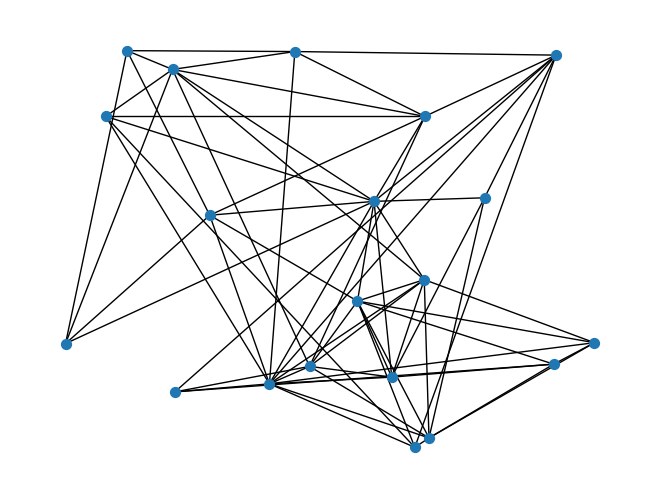

<Figure size 640x480 with 0 Axes>

In [90]:
# Drawing a figure with these locations
plt.figure()
nx.draw(G, node_size = 50, pos = node_locations)
plt.show()
plt.savefig('imgs/prob_fifteen.png')